In [13]:
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode,iplot,plot
import plotly.graph_objs as go
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt

init_notebook_mode(connected=True)
#cf.go_offline()

%matplotlib inline

In [2]:
df1 = pd.read_csv('covid_19_data.csv')

In [3]:
df1.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156292 entries, 0 to 156291
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              156292 non-null  int64  
 1   ObservationDate  156292 non-null  object 
 2   Province/State   111979 non-null  object 
 3   Country/Region   156292 non-null  object 
 4   Last Update      156292 non-null  object 
 5   Confirmed        156292 non-null  float64
 6   Deaths           156292 non-null  float64
 7   Recovered        156292 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.5+ MB


In [5]:
df1.isnull().value_counts()

SNo    ObservationDate  Province/State  Country/Region  Last Update  Confirmed  Deaths  Recovered
False  False            False           False           False        False      False   False        111979
                        True            False           False        False      False   False         44313
dtype: int64

In [6]:
df1.fillna(method='ffill',inplace=True)

In [7]:
df1.isnull().value_counts()

SNo    ObservationDate  Province/State  Country/Region  Last Update  Confirmed  Deaths  Recovered
False  False            False           False           False        False      False   False        156292
dtype: int64

In [8]:
columns =['Recovered','Deaths','Confirmed']
df11 = pd.DataFrame(data= df1,columns=columns)

In [9]:
df11.head()

,Recovered,Deaths,Confirmed
0,0.0,0.0,1.0
1,0.0,0.0,14.0
2,0.0,0.0,6.0
3,0.0,0.0,1.0
4,0.0,0.0,0.0


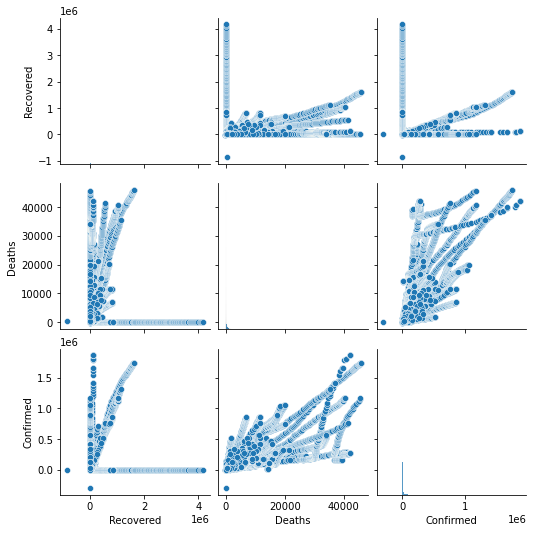

In [10]:
sns.pairplot(df11)

In [4]:
df2 = pd.read_csv('datasets/time_series_covid_19_confirmed.csv')

In [5]:
df2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Columns: 303 entries, Province/State to 11/15/20
dtypes: float64(2), int64(299), object(2)
memory usage: 636.9+ KB


In [7]:
df2.drop(columns=['Lat','Long','Province/State'],axis=1,inplace=True)

In [8]:
df2.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240
1,Albania,0,0,0,0,0,0,0,0,0,...,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830
2,Algeria,0,0,0,0,0,0,0,0,0,...,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679
3,Andorra,0,0,0,0,0,0,0,0,0,...,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872
4,Angola,0,0,0,0,0,0,0,0,0,...,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451


In [9]:
df2['Total_count']=df2.sum(axis=1)

In [15]:
data = dict(type='choropleth',
            colorscale = 'matter',
            locations = df2['Country/Region'], 
            locationmode = 'country names',
            z = df2['Total_count'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Cases"}
            ) 


layout = dict(title = 'COVID-19 WORLD CONFIRMED CASES (till 22/11/2020)',
              geo = dict(scope='world',
                        showframe = False
             )
        )


choromap = go.Figure(data = [data],layout = layout)

plot(choromap)

'temp-plot.html'

In [19]:
x = df2.iplot(kind='scatter',x="Country/Region",y="Total_count",color = 'Blue')

In [19]:
df3 = pd.read_csv('time_series_covid_19_deaths.csv')

In [20]:
df3.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1554,1556,1558,1574,1577,1581,1591,1595,1605,1617
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,549,557,559,571,579,590,598,605,612,623
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2024,2036,2048,2062,2077,2093,2111,2124,2139,2154
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,300,303,307,308,308,312,315,317,322,322


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Columns: 303 entries, Province/State to 11/15/20
dtypes: float64(2), int64(299), object(2)
memory usage: 636.9+ KB


In [22]:
df3.drop(columns=['Province/State','Lat','Long'],axis=1,inplace=True)

In [23]:
df3["Total_count"] = df3.sum(axis=1)

In [24]:
data = dict(type='choropleth',
            colorscale = 'rainbow',
            locations = df3['Country/Region'], 
            locationmode = 'country names',
            z = df3['Total_count'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Cases"}
            ) 


layout = dict(title = 'COVID-19 WORLD DEATH CASES (till 22/11/2020)',
              geo = dict(scope='world',
                        showframe = False
             )
        )


choromap = go.Figure(data = [data],layout = layout)

plot(choromap)

In [25]:
df3.iplot(kind='scatter',x="Country/Region",y="Total_count",color = 'Red')

In [26]:
df4 = pd.read_csv('time_series_covid_19_recovered.csv')

In [27]:
df4.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34440,34446,34458,34721,34954,34967,35024,35036,35067,35092
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11861,12002,12092,12203,12353,12493,12574,12667,12767,12889
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41510,41783,42037,42325,42626,42980,42980,43779,44199,44633
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3858,4043,4248,4332,4405,4488,4585,4675,4675,4747
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5626,5647,5899,5927,6036,6125,6250,6326,6345,6444


In [28]:
df4.drop(columns=['Province/State','Lat','Long'],axis=1,inplace=True)

In [29]:
df4["Total_count"]=df4.sum(axis=1)

In [30]:
data = dict(type='choropleth',
            colorscale = 'brbg',
            locations = df4['Country/Region'], 
            locationmode = 'country names',
            z = df4['Total_count'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Cases"}
            ) 


layout = dict(title = 'COVID-19 WORLD RECOVERED CASES (till 22/11/2020)',
              geo = dict(scope='world',
                        showframe = False
             )
        )


choromap = go.Figure(data = [data],layout = layout)

iplot(choromap)

In [31]:
df4.iplot(kind='scatter',x="Country/Region",y="Total_count",color = 'Green')